In [5]:
import numpy as np #for linear algebra
import pandas as pd #for data processing
import matplotlib.pyplot as plt #for plotting


#Reading data
data = pd.read_csv('headbrain.csv')
print(data.shape)  #gives number of rows and coloumns
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
print(data.info())  #gives information about the csv input file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB
None


In [6]:
print(data.isnull().any()) #checking for null value

Gender                 False
Age Range              False
Head Size(cm^3)        False
Brain Weight(grams)    False
dtype: bool


In [7]:
print(data.nunique()) #checking for unique values

Gender                   2
Age Range                2
Head Size(cm^3)        221
Brain Weight(grams)    146
dtype: int64


In [8]:
#Collecting X and Y values to plot
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [12]:
#Mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
n = len(X)

#To calculate m and c
num = 0
den = 0

for i in range(n):
    num+= ((X[i]-mean_x) * (Y[i]-mean_y))
    den+= ((X[i]-mean_x) ** 2)
    
m = num/den  #m is the slope
c = mean_y - m * mean_x #c=y-mx where c is the y intercept

print(m,c)


0.26342933948939945 325.57342104944223


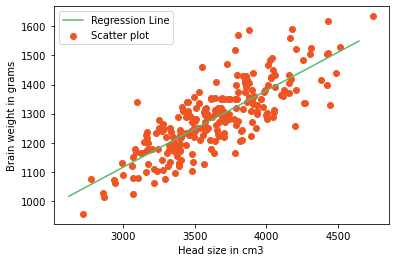

In [16]:
#Plotting values and Regression Line
max_x = np.max(X) - 100
min_x = np.min(X) - 100

#Calculating line values x and y
x = np.linspace(min_x,max_x,1000)
y = m * x + c

#PLotting line
plt.plot(x,y,color='#58b970',label='Regression Line')
#Plotting Scatter Points
plt.scatter(X,Y,c='#ef5423',label='Scatter plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [19]:
#To find out how good our model is, we calc the R-square value (coefficient of determination)
ss_t = 0 #total sum of squares
ss_r = 0 #total sum of residuals
for i in range(n):
    y_pred = c + m * X[i]
    ss_t += (Y[i]-mean_y) ** 2
    ss_r += (Y[i]-y_pred) ** 2
r2 = 1- (ss_r/ss_t)
print(r2)

0.6393117199570003
